<a href="https://colab.research.google.com/github/DiseasedPancake/ALA-Project-Filibium-2-/blob/main/Bias_Detection_in_Clinical_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [11]:
np.random.seed(42)
num_samples = 1000
patient_ids = np.arange(1, num_samples + 1)
ages = np.random.randint(18, 91, num_samples)
genders = np.random.choice(['Female','Male'], num_samples)
weights = np.random.uniform(40, 150, num_samples)
heights = np.random.uniform(140, 200, num_samples)
bmi = weights / ((heights / 100) ** 2)
diagnoses = np.random.choice(['Hypertension', 'Type 2 Diabetes', 'High Cholesterol', 'Osteoporosis'], num_samples)
medications = np.random.choice(['ACE inhibitor', 'Insulin', 'Beta-blocker', 'Statins', 'Calcium supplement', 'Oral antidiabetic', 'Diuretic', 'Fibrate'], num_samples)
data = pd.DataFrame({
    'Patient_ID': patient_ids,
    'Age': ages,
    'Gender': genders,
    'Weight': weights,
    'Height': heights,
    'BMI': bmi,
    'Diagnosis': diagnoses,
    'Medication': medications
})
data.to_csv('synthetic_medical_data.csv', index=False)

print("Synthetic medical data created and saved as synthetic_medical_data.csv")

Synthetic medical data created and saved as synthetic_medical_data.csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

Diagnosis  High Cholesterol  Hypertension  Osteoporosis  Type 2 Diabetes
Gender                                                                  
Female                  118           118           132              135
Male                    141           117           136              103
1000
Diagnosis  High Cholesterol  Hypertension  Osteoporosis  Type 2 Diabetes
Gender                                                                  
Female             0.234592      0.234592      0.262425         0.268390
Male               0.283702      0.235412      0.273642         0.207243


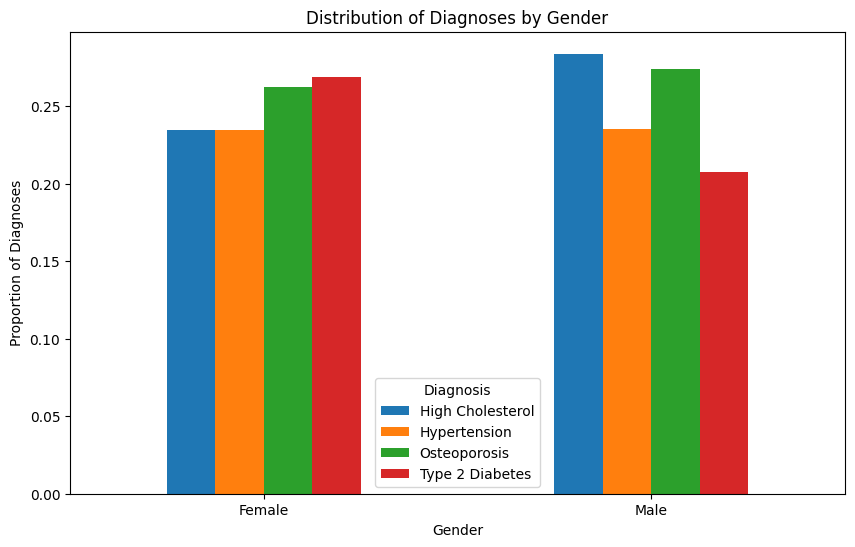

Chi-square statistic: 6.373178296979341
P-value: 0.09480048341044277
There is no evidence of statistically significant difference, indicating less likelihood of bias.


In [6]:
data = pd.read_csv('synthetic_medical_data.csv')
attribute = 'Diagnosis'
sensitive_attribute = 'Gender'
count = data.groupby(sensitive_attribute)[attribute].value_counts(normalize=False).unstack()
print(count)
print(len(data))
diagnosis_distribution = data.groupby(sensitive_attribute)[attribute].value_counts(normalize=True).unstack()
print(diagnosis_distribution)

# Plot the distribution of diagnoses for each gender
diagnosis_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Diagnoses by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Diagnoses')
plt.xticks(rotation=0)
plt.legend(title=attribute)
plt.show()
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data[sensitive_attribute], data[attribute])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation of the chi-square test
alpha = 0.05
if p < alpha:
    print("There is evidence of statistically significant difference, indicating potential bias.")
else:
    print("There is no evidence of statistically significant difference, indicating less likelihood of bias.")

In [13]:
np.random.seed(42)
num_samples = 2000
patient_ids = np.arange(1, num_samples + 1)
ages = np.random.randint(18, 91, num_samples)
genders = np.random.choice(['Female','Male'], num_samples)
weights = np.random.uniform(40, 150, num_samples)
heights = np.random.uniform(140, 200, num_samples)
bmi = weights / ((heights / 100) ** 2)
diagnoses = np.random.choice(['Hypertension', 'Type 2 Diabetes', 'High Cholesterol', 'Osteoporosis'], num_samples)
medications = np.random.choice(['ACE inhibitor', 'Insulin', 'Beta-blocker', 'Statins', 'Calcium supplement', 'Oral antidiabetic', 'Diuretic', 'Fibrate'], num_samples)
data = pd.DataFrame({
    'Patient_ID': patient_ids,
    'Age': ages,
    'Gender': genders,
    'Weight': weights,
    'Height': heights,
    'BMI': bmi,
    'Diagnosis': diagnoses,
    'Medication': medications
})
data.to_csv('Modified synthetic_medical_data.csv', index=False)

print("Synthetic medical data created and saved as Modified synthetic_medical_data.csv")

Synthetic medical data created and saved as Modified synthetic_medical_data.csv


Diagnosis  High Cholesterol  Hypertension  Osteoporosis  Type 2 Diabetes
Gender                                                                  
Female                  242           276           249              239
Male                    241           283           226              244
2000
Diagnosis  High Cholesterol  Hypertension  Osteoporosis  Type 2 Diabetes
Gender                                                                  
Female             0.240557      0.274354      0.247515         0.237575
Male               0.242455      0.284708      0.227364         0.245473


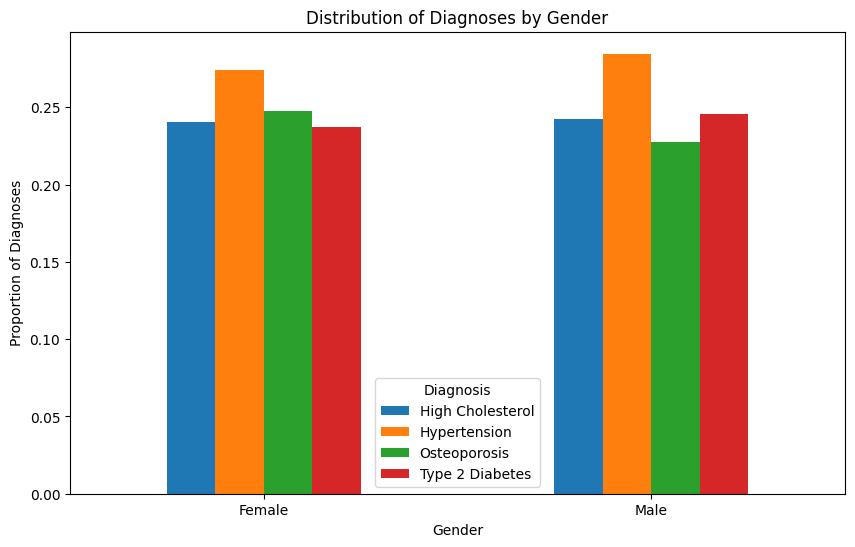

Chi-square statistic: 1.1832135634748673
P-value: 0.7570331438052429
There is no evidence of statistically significant difference, indicating less likelihood of bias.


In [14]:
data = pd.read_csv('Modified synthetic_medical_data.csv')
attribute = 'Diagnosis'
sensitive_attribute = 'Gender'
count = data.groupby(sensitive_attribute)[attribute].value_counts(normalize=False).unstack()
print(count)
print(len(data))
diagnosis_distribution = data.groupby(sensitive_attribute)[attribute].value_counts(normalize=True).unstack()
print(diagnosis_distribution)

# Plot the distribution of diagnoses for each gender
diagnosis_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Diagnoses by Gender')
plt.xlabel('Gender')
plt.ylabel('Proportion of Diagnoses')
plt.xticks(rotation=0)
plt.legend(title=attribute)
plt.show()
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data[sensitive_attribute], data[attribute])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

# Interpretation of the chi-square test
alpha = 0.05
if p < alpha:
    print("There is evidence of statistically significant difference, indicating potential bias.")
else:
    print("There is no evidence of statistically significant difference, indicating less likelihood of bias.")

Diagnosis  High Cholesterol  Hypertension  Osteoporosis  Type 2 Diabetes
Age                                                                     
18                      5.0           4.0           8.0              6.0
19                      5.0           5.0           4.0              3.0
20                      1.0           4.0           4.0              5.0
21                      5.0           4.0           3.0              3.0
22                      5.0           2.0           5.0              5.0
..                      ...           ...           ...              ...
86                      5.0           2.0           3.0              4.0
87                      4.0           4.0           NaN              5.0
88                      3.0           5.0           NaN              1.0
89                      1.0           4.0           4.0              4.0
90                      1.0           1.0           5.0              2.0

[73 rows x 4 columns]
1000
Diagnosis  High Cholest

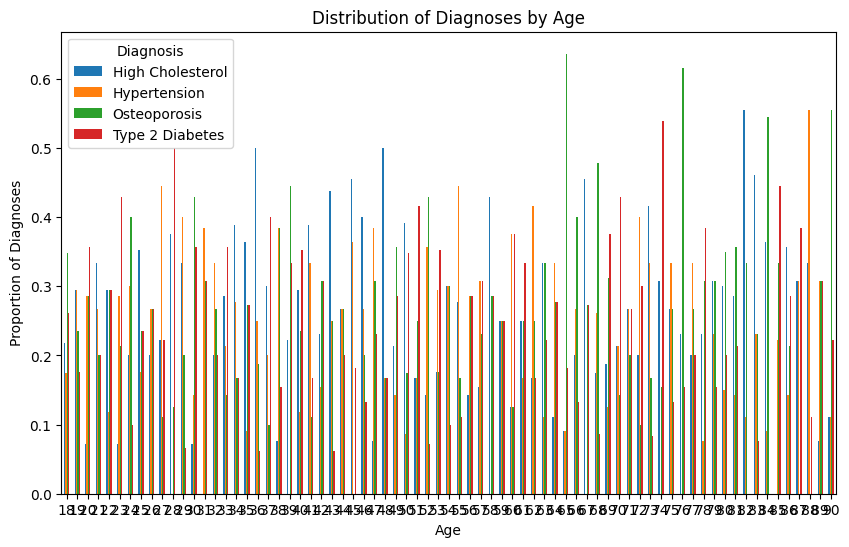

Chi-square statistic: 217.0129416746332
P-value: 0.4678288025147834
There is no evidence of statistically significant difference, indicating less likelihood of bias.


In [10]:
data = pd.read_csv('synthetic_medical_data.csv')
attribute = 'Diagnosis'
sensitive_attribute = 'Age'
count = data.groupby(sensitive_attribute)[attribute].value_counts(normalize=False).unstack()
print(count)
print(len(data))
diagnosis_distribution = data.groupby(sensitive_attribute)[attribute].value_counts(normalize=True).unstack()
print(diagnosis_distribution)
diagnosis_distribution.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Diagnoses by Age')
plt.xlabel('Age')
plt.ylabel('Proportion of Diagnoses')
plt.xticks(rotation=0)
plt.legend(title=attribute)
plt.show()
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data[sensitive_attribute], data[attribute])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
alpha = 0.05
if p < alpha:
    print("There is evidence of statistically significant difference, indicating potential bias.")
else:
    print("There is no evidence of statistically significant difference, indicating less likelihood of bias.")